# QURAN & NLP 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Quran_English.csv", encoding= 'unicode_escape')
df.head()

,Surah,Ayat,Translation
0,1,1,In the name of Allah Most Gracious Most Merciful.
1,1,2,Praise be to Allah the Cherisher and Sustainer...
2,1,3,Most Gracious Most Merciful;
3,1,4,Master of the Day of Judgment.
4,1,5,Thee do we worship and Thine aid we seek.


In [3]:
clean_text = []
text=[]
for index, row in df.iterrows():
    clean_text.append(row['Translation'])
    text.append(str(row['Surah'])+"|"+str(row['Ayat'])+"|"+row['Translation'])

In [4]:
len(text)

6162

In [5]:
text[0]

'1|1|In the name of Allah Most Gracious Most Merciful.'

In [6]:
text[1]

'1|2|Praise be to Allah the Cherisher and Sustainer of the worlds;'

In [7]:
surah = []
ayat = []
curr = 1
for i in range(len(text)):
    if int(text[i].split("|")[0]) != curr:
        if len(ayat)>0:
            surah.append(ayat)
        ayat = []
        curr+=1
    
    ayat.append(clean_text[i])
surah.append(ayat)

In [8]:
surah[0]

['In the name of Allah Most Gracious Most Merciful.',
 'Praise be to Allah the Cherisher and Sustainer of the worlds;',
 'Most Gracious Most Merciful;',
 'Master of the Day of Judgment.',
 'Thee do we worship and Thine aid we seek.',
 'Show us the straight way',
 'The way of those on whom Thou hast bestowed Thy Grace those whose (portion) is not wrath and who go not astray.']

In [9]:
surah[-1]

['Say: I seek refuge with the Lord and Cherisher of Mankind',
 'The King (or Ruler) of Mankind',
 'The god (or judge) of Mankind-',
 'From the mischief of the Whisperer (of Evil) who withdraws (after his whisper)-',
 '(The same) who whispers into the hearts of Mankind-',
 'Among Jinns and among men.']

In [10]:
quran = ""
for ayats in surah:
    for ayat in ayats:
        quran += ayat + "\n"

In [11]:
len(quran)

862608

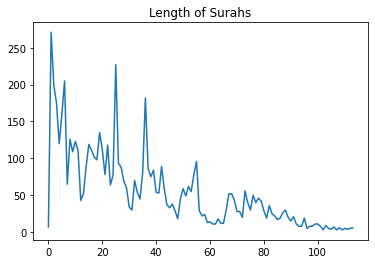

In [12]:
len_of_surahs = []
for i in surah:
    len_of_surahs.append(len(i))

plt.title("Length of Surahs")
plt.plot(len_of_surahs)

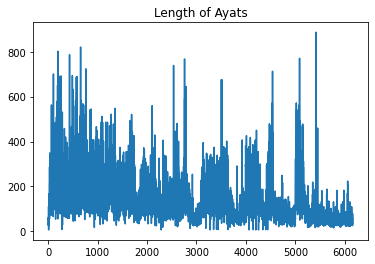

In [13]:
len_of_ayats = []
for i in surah:
    for j in i:
        len_of_ayats.append(len(j))
    
plt.title("Length of Ayats")
plt.plot(len_of_ayats)

# NLP

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(quran)

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [ ]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
        
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [ ]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

clean_data = ' '.join(lemmatized_word)
len(clean_data)

In [ ]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['quran']
df

In [ ]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [ ]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

In [ ]:
data = data_vect_feat.transpose()
data.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each 
words = []
for x in data:
    top = [word for (word, count) in top_dict[x]]
    for t in top:
        words.append(t)

print(words[:10])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Quran",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('topmost.png')

# Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Islam is the best religion!")

In [ ]:
sia.polarity_scores(quran)

In [ ]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1